# Pyam Integration

*Note:* These notebooks will be re-written as part of our [first milestone](https://github.com/openclimatedata/openscm/milestone/1)

Here we make use of the ``scenarios`` module of OpenSCM. However, keep in mind the [direct connection to the IIASA database made available in Pyam](https://pyam-iamc.readthedocs.io/en/latest/tutorials/iiasa_dbs.html) for more in-depth analysis with up-to-date scenarios.

## Imports

In [1]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
import pyam
import seaborn as sns

from pyam import IamDataFrame
from openscm import run
from openscm.scmdataframe import ScmDataFrame
from openscm.scenarios import rcps

<IPython.core.display.Javascript object>

In [2]:
sns.set(style="darkgrid")

## Scenarios

Here we use the RCPs. Just for illustration, we firstly convert them back to `pyam.IamDataFrame`, then show how OpenSCM works with IamDataFrames from this point onwards.

*Note:* we have to filter the data first as IamDataFrames do not work with data outside of Panda's datetime bounds (see [here](https://stackoverflow.com/a/37226672)). 

In [3]:
df = IamDataFrame(rcps.filter(year=range(1, 2201)).timeseries())
type(df)

pyam.core.IamDataFrame

### Pyam features

The following cells provide a brief overview of the metadata and plots that can be examined with a `pyam.IamDataFrame`.

In [4]:
# NBVAL_IGNORE_OUTPUT
df["variable"].unique()

array(['Emissions|BC', 'Emissions|C2F6', 'Emissions|C6F14',
       'Emissions|CCl4', 'Emissions|CF4', 'Emissions|CFC11',
       'Emissions|CFC113', 'Emissions|CFC114', 'Emissions|CFC115',
       'Emissions|CFC12', 'Emissions|CH3Br', 'Emissions|CH3CCl3',
       'Emissions|CH3Cl', 'Emissions|CH4', 'Emissions|CO',
       'Emissions|CO2|MAGICC AFOLU',
       'Emissions|CO2|MAGICC Fossil and Industrial', 'Emissions|HCFC141b',
       'Emissions|HCFC142b', 'Emissions|HCFC22', 'Emissions|HFC125',
       'Emissions|HFC134a', 'Emissions|HFC143a', 'Emissions|HFC227ea',
       'Emissions|HFC23', 'Emissions|HFC245fa', 'Emissions|HFC32',
       'Emissions|HFC4310', 'Emissions|Halon1202', 'Emissions|Halon1211',
       'Emissions|Halon1301', 'Emissions|Halon2402', 'Emissions|N2O',
       'Emissions|NH3', 'Emissions|NMVOC', 'Emissions|NOx',
       'Emissions|OC', 'Emissions|SF6', 'Emissions|SOx'], dtype=object)

In [5]:
df["region"].unique()

array(['World'], dtype=object)

In [6]:
df["scenario"].unique()

array(['RCP60', 'RCP26', 'RCP85', 'RCP45'], dtype=object)

*Note:* For an explanation of the `parameter_type` column, see the 'timeseries-conversion' notebook.

In [7]:
# NBVAL_IGNORE_OUTPUT
df.timeseries().head()

1765-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.000000   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010763   

                                                                    1766-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.106998   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010752   

                                                                    1767-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.133383   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010748   

                                                                    1768-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.159847   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010744   

                                                                    1769-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.186393   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010740   

                                                                    1770-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.213024   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010736   

                                                                    1771-01-01  \
model scenario region variable        unit          parameter_type               
AIM   RCP60    World  Emissions|BC    Mt BC / yr    average           0.239742   
                      Emissions|C2F6  kt C2F6 / yr  average           0.000000   
                      Emissions|C6F14 kt C6F14 / yr average           0.000000   
                      Emissions|CCl4  kt CCl4 / yr  average           0.000000   
                      Emissions|CF4   kt CF4 / yr   average           0.010731   

                                           

Pyam's plotting functions provide great defaults for making all sorts of informative plots.

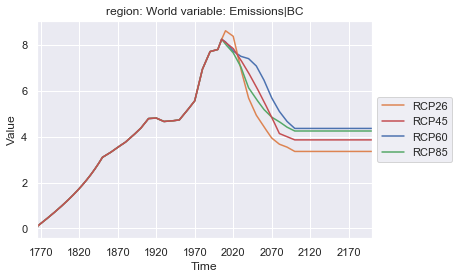

In [8]:
df.filter(variable='Emissions|BC').line_plot(
    x="time",
    color='scenario', 
    legend=dict(loc='center left', bbox_to_anchor=(1.0, 0.5))
);

The use of a `pd.DataFrame` underneath the hood makes integration with other tools, like seaborn, trivial.

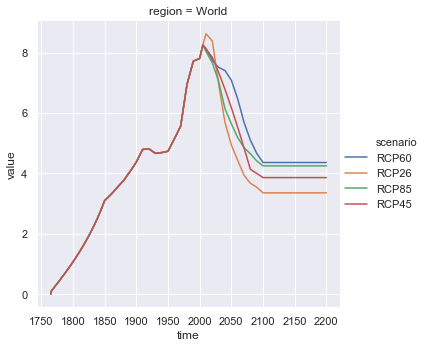

In [9]:
emissions_bc = df.filter(
    variable="Emissions|BC"
).data
sns.relplot(
    x="time",
    y="value",
    kind="line",
    col="region",
    hue="scenario",
    data=emissions_bc,
    ci=None,
    facet_kws={"sharey": False},
);

## Running scenarios

OpenSCM can directly run scenarios from a `pyam.IamDataFrame` as shown.

In [10]:
for i, label in ScmDataFrame(df)[["model", "scenario"]].drop_duplicates().iterrows():
    print(label.to_dict())

{'model': 'AIM', 'scenario': 'RCP60'}
{'model': 'IMAGE', 'scenario': 'RCP26'}
{'model': 'MESSAGE', 'scenario': 'RCP85'}
{'model': 'MiniCAM', 'scenario': 'RCP45'}


In [11]:
output_iamdf = run(
    df, 
    ["PH99", "DICE"],
    output_time_points=[np.datetime64("{}-01-01".format(y)) for y in range(1800, 2151)],
)

DICE: 100%|██████████| 4/4 [00:09<00:00,  2.26s/it]


In [12]:
type(output_iamdf)

openscm.scmdataframe.pyam_compat.LongDatetimeIamDataFrame

In [13]:
output_iamdf.head()

,model,scenario,region,variable,unit,time,equilibrium climate sensitivity (kelvin),radiative forcing 2xco2 (delta_degc * joule / a / kelvin / meter ** 2),parameter_type,climate_model,value
0,AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,1800-01-01,3.547283,116580000.0,point,PH99,291.298715
1,AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,1801-01-01,3.547283,116580000.0,point,PH99,291.367366
2,AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,1802-01-01,3.547283,116580000.0,point,PH99,291.437346
3,AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,1803-01-01,3.547283,116580000.0,point,PH99,291.509566
4,AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,1804-01-01,3.547283,116580000.0,point,PH99,291.582590


In [14]:
output_scmdf =  run(
    ScmDataFrame(df), 
    ["PH99", "DICE"],
)
type(output_scmdf)

DICE: 100%|██████████| 4/4 [00:09<00:00,  2.35s/it]


openscm.scmdataframe.ScmDataFrame

In [15]:
output_scmdf.head()

,,,,,,,,time,1765-01-01 00:00:00,1766-01-01 00:00:00,1767-01-01 00:00:00,1768-01-01 00:00:00,1769-01-01 00:00:00,1770-01-01 00:00:00,1771-01-01 00:00:00,1772-01-01 00:00:00,1773-01-01 00:00:00,1774-01-01 00:00:00,...,2091-01-01 00:00:00,2092-01-01 00:00:00,2093-01-01 00:00:00,2094-01-01 00:00:00,2095-01-01 00:00:00,2096-01-01 00:00:00,2097-01-01 00:00:00,2098-01-01 00:00:00,2099-01-01 00:00:00,2100-01-01 00:00:00
model,scenario,region,variable,unit,climate_model,equilibrium climate sensitivity (kelvin),parameter_type,radiative forcing 2xco2 (delta_degc * joule / a / kelvin / meter ** 2),,,,,,,,,,,,,,,,,,,,,
AIM,RCP60,World,Atmospheric Concentrations|CO2,ppm,PH99,3.547283,point,116580000.0,290.0,290.001409,290.005300,290.011627,290.020370,290.031437,290.044811,290.060918,290.079292,290.099790,...,633.973012,635.729150,637.444862,639.111780,640.735387,642.316504,643.860110,645.358709,646.817241,648.236459
IMAGE,RCP26,World,Atmospheric Concentrations|CO2,ppm,PH99,3.547283,point,116580000.0,290.0,290.001409,290.005300,290.011627,290.020370,290.031437,290.044811,290.060918,290.079292,290.099790,...,407.391756,406.032295,404.690871,403.374320,402.078468,400.802856,399.543613,398.307163,397.089601,395.890502
MESSAGE,RCP85,World,Atmospheric Concentrations|CO2,ppm,PH99,3.547283,point,116580000.0,290.0,290.001409,290.005300,290.011627,290.020370,290.031437,290.044811,290.060918,290.079292,290.099790,...,815.328693,820.711328,826.049315,831.314830,836.523811,841.677492,846.791004,851.837646,856.832630,861.777091
MiniCAM,RCP45,World,Atmospheric Concentrations|CO2,ppm,PH99,3.547283,point,116580000.0,290.0,290.001409,290.005300,290.011627,290.020370,290.031437,290.044811,290.060918,290.079292,290.099790,...,514.693666,513.718021,512.768553,511.849803,510.958564,510.094263,509.254064,508.441958,507.655089,506.892930
AIM,RCP60,World,Cumulative Emissions|CO2,gigatC,PH99,3.547283,point,116580000.0,0.0,0.002998,0.011331,0.024998,0.044053,0.068390,0.098062,0.134067,0.175521,0.222196,...,1550.176715,1564.660622,1579.121889,1593.481731,1607.779525,1622.015242,1636.227628,1650.339275,1664.388873,1678.376400


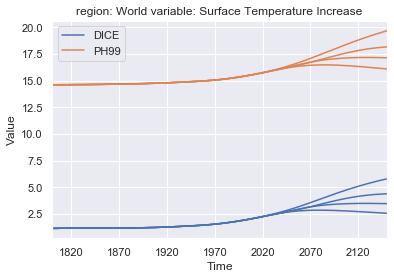

In [16]:
output_iamdf.filter(
    variable="Surface Temperature Increase"
).line_plot(x="time", color="climate_model");

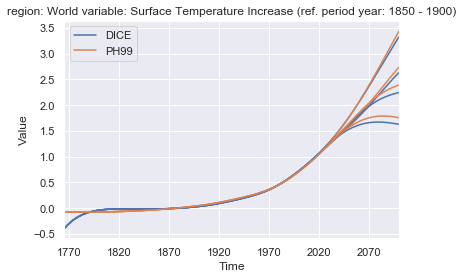

In [17]:
ScmDataFrame(output_scmdf.filter(
    variable="Surface Temperature Increase"
).relative_to_ref_period_mean(
    year=range(1850, 1901)
)).line_plot(color="climate_model");